In [51]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
# Generate data
X, y= make_blobs(centers= 4, n_samples= 500, n_features= 2, shuffle= True, random_state= 42)
print(X.shape)

(500, 2)


**K Means ++ algorithm for better initialization**<br>
1. Select the first centroid at random.<br>
2. a. Now calculate the distant between all the points which are not centroid and the closet centroid point.<br>
    b. Normalize the calculated distance and use the normalized distance as probability distribution for selecting the next centroid.<br>
    The point with the largest distance has higher probability to get selected as the next centroid.<br>
3. Repeat step 2 until all the centroids are calculated.

In [6]:
k = 4

In [48]:
# S1: select the first centroid at random.
centroid1_idx = np.random.choice(range(X.shape[0]), size=1, replace=False)
centroids = np.zeros((k, X.shape[1]))
centroids[0] = X[centroid1_idx]

In [40]:
centroid = centroids[0]
distance = ((X - centroid) * (X - centroid)).sum(axis=1)
prob = distance / distance.sum()
print(prob.sum())
centroid2 = np.random.choice(range(X.shape[0]), size=1, p=prob)

0.9999999999999999


In [44]:
distance.min()

0.0

In [49]:
# Find the distance between centroids and data points
for i in range(1, k):
    distances = []
    for centroid in centroids:
        # Calculate the distance between points and the centroid
        distance = ((X - centroid) * (X - centroid)).sum(axis=1)
        distances.append(distance)
    distance = np.min(distances, axis=0)
    prob = distance / distance.sum()
    centroid_next = np.random.choice(range(X.shape[0]), size=1, p=prob)
    centroids[i] = X[centroid_next]

In [50]:
centroids

array([[-7.33898809, -7.72995396],
       [-2.44896741, 11.47752824],
       [ 3.71294836,  1.91364433],
       [-9.46529481,  9.13597147]])

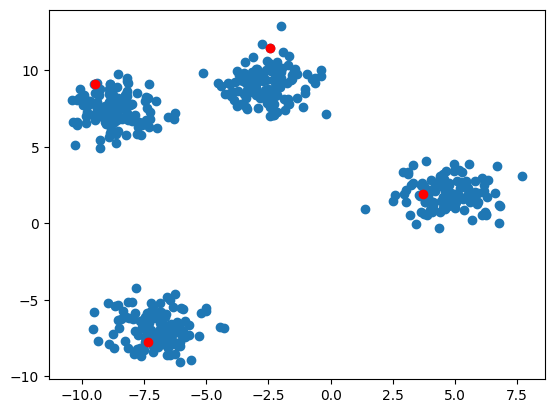

In [53]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r')